### SMS Spam Classifier: Using Bernoulli Naive Bayes/Multinomial Naive Bayes/Logistic Regression

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model using 3 different methods
    - Model building 
    - Model evaluation

### 1. Importing and Preprocessing Data


In [5]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [6]:
docs = pd.read_table("SMSSpamCollection", header = None, names = ['Class', 'sms'])
print(docs.head(3).append(docs.tail(3)))
docs.info()

     Class                                                sms
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
print(docs.shape)

(5572, 2)


In [9]:
# Count the Ham/Spam
ham_spam = docs.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [10]:
# Spam Rate
spam_rate = round(((ham_spam[1]/(ham_spam[0]+ham_spam[1]))*100),2)
print("Percentage of Spam sms:", spam_rate)

Percentage of Spam sms: 13.41


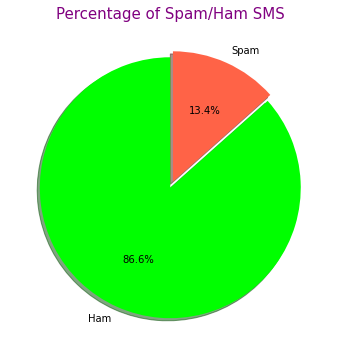

In [11]:
my_color = ['Lime','tomato']
my_lable = ["Ham" , "Spam"]
explode = (0, 0.05) 
fig = plt.figure(figsize=(6,6), facecolor='white')
plt.title('Percentage of Spam/Ham SMS',color = 'purple',fontsize = 15)
plt.pie(ham_spam, explode = explode, labels = my_lable, colors = my_color, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [7]:
# Lable the Class now (0: Ham, 1: Spam)

docs['label'] = docs.Class.map({'spam':1, 'ham':0})
docs.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
# Drop the Class Colum
docs = docs.drop('Class', axis = 1)
docs.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
# Divide into X and y for training
X = docs['sms']
y = docs['label']

print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [10]:
# splitting into test and train
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 1)

In [11]:
print("Dataset Sizes are:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.head(3))
print(y_train.head(3))

Dataset Sizes are: (3900,) (1672,) (3900,) (1672,)
4393                       what are your new years plans?
216     Finally the match heading towards draw as your...
4471    Lemme know when I can swing by and pick up, I'...
Name: sms, dtype: object
4393    0
216     0
4471    0
Name: label, dtype: int64


In [12]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [13]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [14]:
# Q: What will be shape of X_train now??
print(X_train.shape)  

(3900,)


In [16]:
# printing the vocabulary
import itertools # to slice the dictionary item
print("Total Vocab size is:", len(vect.vocabulary_))
print(type(vect.vocabulary_))
dict(itertools.islice(vect.vocabulary_.items(), 5))

Total Vocab size is: 6904
<class 'dict'>


{'new': 4272, 'years': 6855, 'plans': 4682, 'finally': 2550, 'match': 3930}

In [17]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [18]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed.shape)   # Any guess?
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
(3900, 6904)
  (0, 4272)	1
  (0, 4682)	1
  (0, 6855)	1
  (1, 2202)	1
  (1, 2550)	1
  (1, 3018)	1
  (1, 3930)	1
  (1, 4801)	1
  (2, 1119)	1
  (2, 2663)	1
  (2, 3548)	1
  (2, 3650)	1
  (2, 4644)	1
  (2, 5369)	1
  (2, 5957)	1
  (2, 6163)	1
  (3, 1485)	1
  (3, 4406)	1
  (3, 6353)	1
  (4, 103)	1
  (4, 222)	1
  (4, 538)	1
  (4, 1949)	1
  (4, 2000)	1
  (4, 2478)	1
  :	:
  (3897, 3721)	1
  (3897, 4248)	1
  (3897, 5026)	1
  (3897, 5949)	1
  (3897, 6839)	1
  (3898, 243)	1
  (3898, 295)	1
  (3898, 344)	1
  (3898, 799)	1
  (3898, 1959)	1
  (3898, 2590)	1
  (3898, 3435)	1
  (3898, 3472)	1
  (3898, 3966)	1
  (3898, 4148)	1
  (3898, 4584)	1
  (3898, 5031)	1
  (3898, 5115)	1
  (3898, 5273)	1
  (3898, 5399)	1
  (3898, 6074)	1
  (3898, 6122)	1
  (3898, 6196)	1
  (3899, 1574)	1
  (3899, 5590)	1


## 2. Model Building

**2.1 Bernoulli Naive Bayes**

In [12]:
from sklearn.naive_bayes import BernoulliNB
# instantiate bernoulli NB object
bnb = BernoulliNB()
# fit 
bnb.fit(X_train_transformed,y_train)
# predict class
y_pred_class_bnb = bnb.predict(X_test_transformed)
# predict probability
y_pred_proba_bnb =bnb.predict_proba(X_test_transformed)
# Model type
print(bnb)

NameError: name 'X_train_transformed' is not defined

**2.2 Multinomial Naive Bayes**

In [20]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
# fit
mnb.fit(X_train_transformed,y_train)
# predict class
y_pred_class_mnb = mnb.predict(X_test_transformed)
# predict probabilities
y_pred_proba_mnb = mnb.predict_proba(X_test_transformed)
# Model type
print(mnb)

MultinomialNB()


**2.3 Logistic Regression**

In [22]:
from sklearn.linear_model import LogisticRegression
## Log Regresiiom
logR = LogisticRegression()
# fit
logR.fit(X_train_transformed,y_train)
# predict class
y_pred_class_logR = logR.predict(X_test_transformed)
# predict probabilities
y_pred_proba_logR = logR.predict_proba(X_test_transformed)
# Model type
print(logR)

LogisticRegression()


## 3. Model Evaluation

*Source: https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/

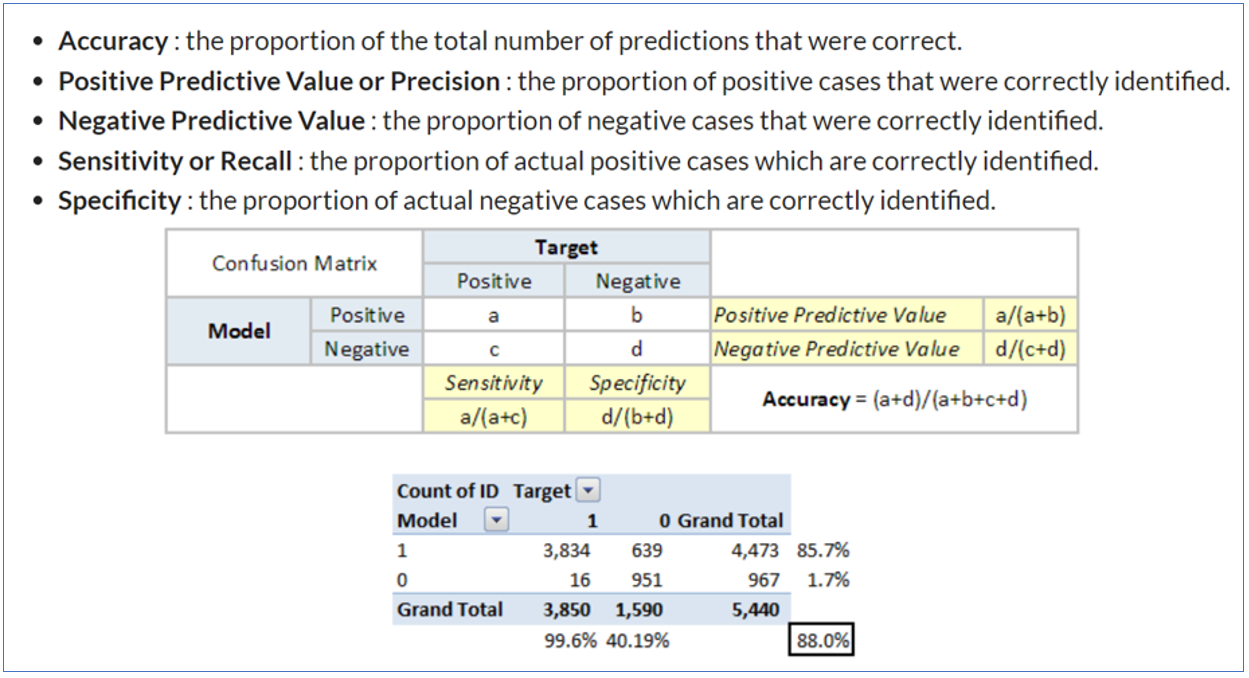

**1. Accuracy**

In [25]:
# accuracy
from sklearn import metrics

print("Accuracy for Bernoulli NB is:", round(metrics.accuracy_score(y_test, y_pred_class_bnb),3))
print("Accuracy for Multinomial NB is:", round(metrics.accuracy_score(y_test, y_pred_class_mnb),3))
print("Accuracy for Logistic Regression is:", round(metrics.accuracy_score(y_test, y_pred_class_logR),3))

Accuracy for Bernoulli NB is: 0.973
Accuracy for Multinomial NB is: 0.986
Accuracy for Logistic Regression is: 0.976


**2. Confusion Matrix**

In [24]:
conf_bnb = metrics.confusion_matrix(y_test, y_pred_class_bnb)
print(conf_bnb)
print("--------------------")
conf_mnb = metrics.confusion_matrix(y_test, y_pred_class_mnb)
print(conf_mnb)
print("--------------------")
conf_logR = metrics.confusion_matrix(y_test, y_pred_class_logR)
print(conf_logR)

[[1441    1]
 [  44  186]]
--------------------
[[1434    8]
 [  15  215]]
--------------------
[[1438    4]
 [  36  194]]


**3. Precision, Sensitivity (or Recall), Specificity, and F1 Score**

In [27]:
print("For BernoulliNB Model >>>> ")
print("--------------------")
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class_bnb))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class_bnb))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class_bnb))
confusion = metrics.confusion_matrix(y_test, y_pred_class_bnb)
#[row, column]
TN = conf_bnb[0, 0]
FP = conf_bnb[0, 1]
FN = conf_bnb[1, 0]
TP = conf_bnb[1, 1]
specificity_bnb = TN / float(TN + FP)
print("SPECIFITY SCORE :", specificity_bnb, end = "\n\n")

print("For Multinomial NB Model >>>> ")
print("--------------------")
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class_mnb))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class_mnb))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class_mnb))
confusion = metrics.confusion_matrix(y_test, y_pred_class_mnb)
#[row, column]
TN = conf_mnb[0, 0]
FP = conf_mnb[0, 1]
FN = conf_mnb[1, 0]
TP = conf_mnb[1, 1]
specificity_mnb = TN / float(TN + FP)
print("SPECIFITY SCORE :", specificity_mnb, end = "\n\n")

print("For Logistic Regression Model >>>> ")
print("--------------------")
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class_logR))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class_logR))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class_logR))
confusion = metrics.confusion_matrix(y_test, y_pred_class_logR)
#[row, column]
TN = conf_logR[0, 0]
FP = conf_logR[0, 1]
FN = conf_logR[1, 0]
TP = conf_logR[1, 1]
specificity_logR = TN / float(TN + FP)
print("SPECIFITY SCORE :", specificity_logR)


For BernoulliNB Model >>>> 
--------------------
PRECISION SCORE : 0.9946524064171123
RECALL SCORE : 0.808695652173913
F1 SCORE : 0.8920863309352518
SPECIFITY SCORE : 0.9993065187239945

For Multinomial NB Model >>>> 
--------------------
PRECISION SCORE : 0.9641255605381166
RECALL SCORE : 0.9347826086956522
F1 SCORE : 0.9492273730684327
SPECIFITY SCORE : 0.9944521497919556

For Logistic Regression Model >>>> 
--------------------
PRECISION SCORE : 0.9797979797979798
RECALL SCORE : 0.8434782608695652
F1 SCORE : 0.9065420560747663
SPECIFITY SCORE : 0.9972260748959778


**4. Area Under ROC (Receiver operating characteristic) Curve**

The ROC curve is the plot between sensitivity and (1- specificity). (1- specificity) is also known as false positive rate and sensitivity is also known as True Positive rate.  

Bernoulli NB Model >>>> 
Area Under Curve= 0.996


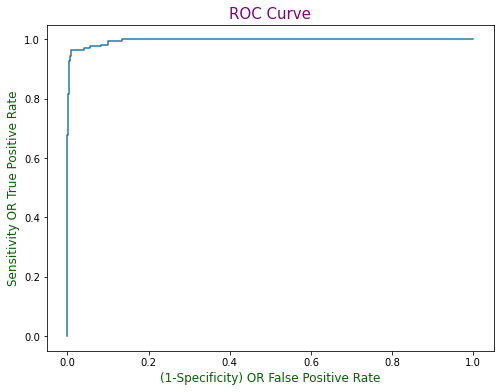

Multinomial NB Model >>>> 
Area Under Curve= 0.992


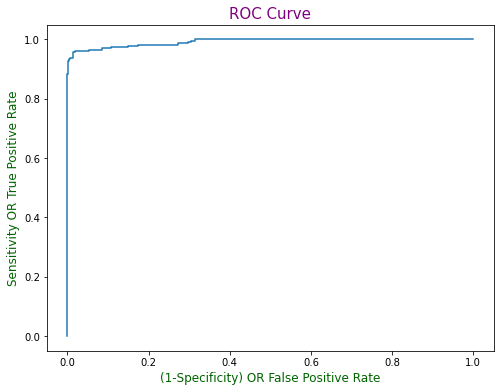

Logistic Regression Model >>>> 
Area Under Curve= 0.994


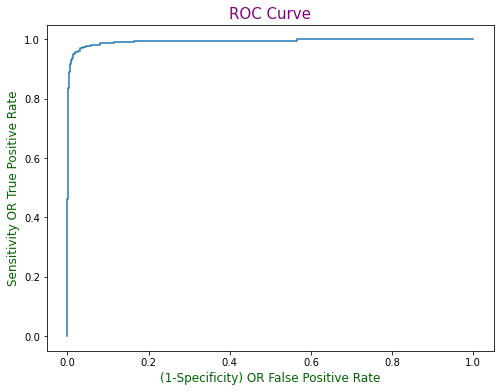

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(x):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, x[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("Area Under Curve=", round((roc_auc),3))
     
    %matplotlib inline
    plt.figure(figsize = (8,6))
    plt.ylabel('Sensitivity OR True Positive Rate',fontsize = 12, color = 'darkgreen')
    plt.xlabel('(1-Specificity) OR False Positive Rate',fontsize = 12, color = 'darkgreen')
    plt.title('ROC Curve', fontsize = 15, color = 'purple')
    plt.plot(false_positive_rate, true_positive_rate)
    plt.show()
    
print("Bernoulli NB Model >>>> ")
plot_roc(y_pred_proba_bnb) 
print("Multinomial NB Model >>>> ")
plot_roc(y_pred_proba_mnb) 
print("Logistic Regression Model >>>> ")
plot_roc(y_pred_proba_logR)  

**Definition of All Metrics for Classification Problems:**

*Source: https://en.wikipedia.org/wiki/Precision_and_recall

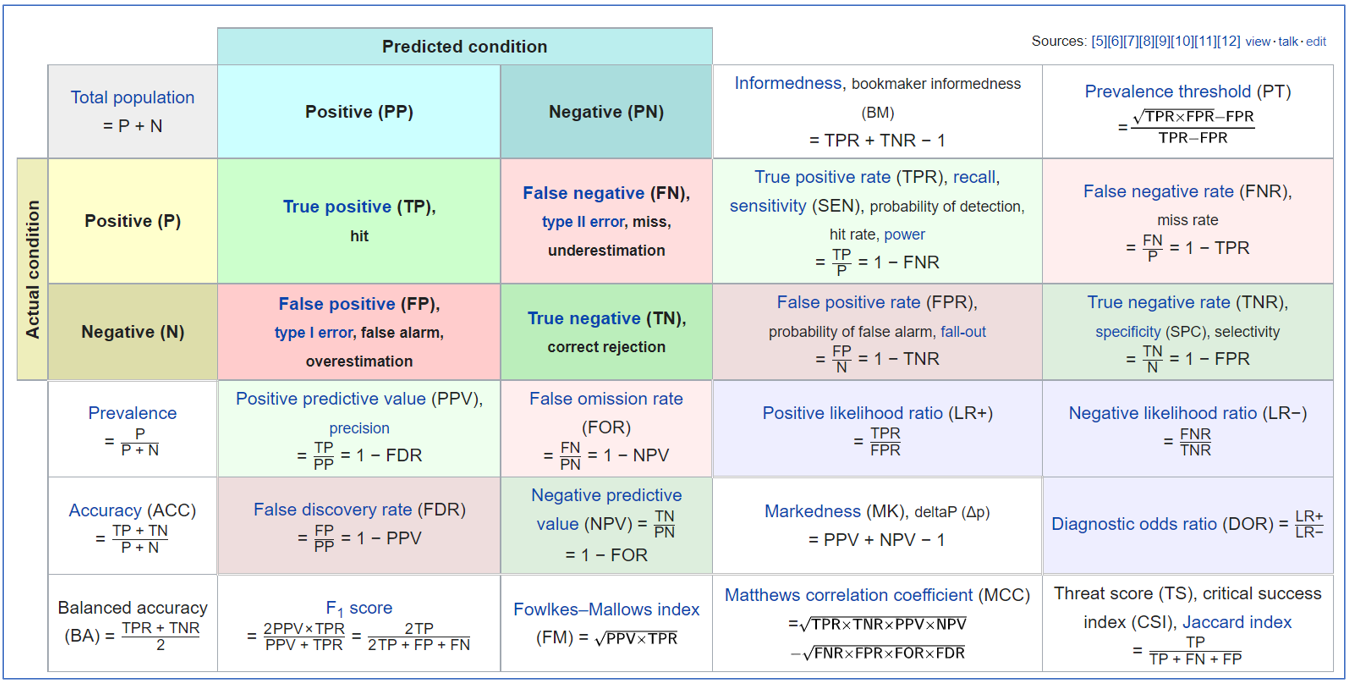